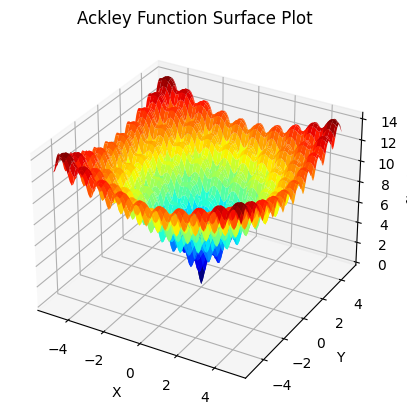

In [5]:
from numpy import arange
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi
from numpy import meshgrid
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
 
# objective function
def objective(x, y):
	return -20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2))) - exp(0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) + e + 20
 
# define range for input
r_min, r_max = -5.0, 5.0
# sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a surface plot with the jet color scheme
figure = pyplot.figure()
axis = figure.add_subplot(111, projection='3d')  # Use add_subplot instead of gca
axis.plot_surface(x, y, results, cmap='jet')
# Add labels for clarity
axis.set_xlabel('X')
axis.set_ylabel('Y')
axis.set_zlabel('f(X, Y)')
axis.set_title('Ackley Function Surface Plot')
# Show the plot
pyplot.show()

In [20]:
# hill climbing search of the ackley objective function
from numpy import asarray
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
 
# objective function
def objective(v):
	x, y = v
	return -20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2))) - exp(0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) + e + 20
 
# check if a point is within the bounds of the search
def in_bounds(point, bounds):
	# enumerate all dimensions of the point
	for d in range(len(bounds)):
		# check if out of bounds for this dimension
		if point[d] < bounds[d, 0] or point[d] > bounds[d, 1]:
			return False
	return True
 
# hill climbing local search algorithm
def hillclimbing(objective, bounds, n_iterations, step_size):
	# generate an initial point
	solution = None
	while solution is None or not in_bounds(solution, bounds):
		solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# evaluate the initial point
	solution_eval = objective(solution)
	# run the hill climb
	for i in range(n_iterations):
		# take a step
		candidate = None
		while candidate is None or not in_bounds(candidate, bounds):
			candidate = solution + randn(len(bounds)) * step_size
		# evaluate candidate point
		candidte_eval = objective(candidate)
		# check if we should keep the new point
		if candidte_eval <= solution_eval:
			# store the new point
			solution, solution_eval = candidate, candidte_eval
			# report progress
			print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solution, solution_eval]
 
# seed the pseudorandom number generator
seed(1)
# define range for input
bounds = asarray([[-5.0, 5.0], [-5.0, 5.0]])
# define the total iterations
n_iterations = 1000
# define the maximum step size
step_size = 0.05
# perform the hill climbing search
best, score = hillclimbing(objective, bounds, n_iterations, step_size)
print('Done!')
print('f(%s) = %f' % (best, score))

>0 f([-0.85618854  2.1495965 ]) = 6.46986
>1 f([-0.81291816  2.03451957]) = 6.07149
>5 f([-0.82903902  2.01531685]) = 5.93526
>7 f([-0.83766043  1.97142393]) = 5.82047
>9 f([-0.89269139  2.02866012]) = 5.68283
>12 f([-0.8988359   1.98187164]) = 5.55899
>13 f([-0.9122303   2.00838942]) = 5.55566
>14 f([-0.94681334  1.98855174]) = 5.43024
>15 f([-0.98117198  1.94629146]) = 5.39010
>23 f([-0.97516403  1.97715161]) = 5.38735
>39 f([-0.98628044  1.96711371]) = 5.38241
>362 f([-0.9808789   1.96858459]) = 5.38233
>629 f([-0.98102417  1.96555308]) = 5.38194
Done!
f([-0.98102417  1.96555308]) = 5.381939


array([0.42832045, 0.85403638])

array([5., 5.])